In [1]:
import pandas as pd
import numpy as np
pd.set_option('max_colwidth', 20)
pd.set_option('display.max_columns',None)       
pd.set_option('display.max_rows',50)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,8)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
from ipywidgets import interact
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
data=pd.read_csv('/content/gdrive/MyDrive/SmartBridge/Projects/OptiCrop/Crop_recommendation.csv')
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
data.shape

(2200, 8)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [6]:
df=data.copy(deep=True)

In [7]:
new_column_names = {'N': 'nitrogen', 'P': 'phosphorous', 'K': 'potassium'}
df = df.rename(columns=new_column_names)
df.head()

,nitrogen,phosphorous,potassium,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [8]:
df.isnull().sum()

nitrogen       0
phosphorous    0
potassium      0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [9]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [10]:
df['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

<Axes: >

<ipython-input-11-f2106323a035>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["nitrogen"], color="orange")


<Axes: xlabel='nitrogen', ylabel='Density'>

Text(0.5, 0, 'Ratio of Nitrogen')

<Axes: >

<ipython-input-11-f2106323a035>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["phosphorous"], color="darkblue")


<Axes: xlabel='phosphorous', ylabel='Density'>

Text(0.5, 0, 'Ratio of Phosphorous')

<Axes: >

<ipython-input-11-f2106323a035>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["potassium"], color="pink")


<Axes: xlabel='potassium', ylabel='Density'>

Text(0.5, 0, 'Ratio of Potassium')

<Axes: >

<ipython-input-11-f2106323a035>:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["temperature"], color="green")


<Axes: xlabel='temperature', ylabel='Density'>

Text(0.5, 0, 'Ratio of Temperature')

<Axes: >

<ipython-input-11-f2106323a035>:22: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["humidity"], color="blue")


<Axes: xlabel='humidity', ylabel='Density'>

Text(0.5, 0, 'Ratio of Humidity')

<Axes: >

<ipython-input-11-f2106323a035>:27: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["ph"], color="red")


<Axes: xlabel='ph', ylabel='Density'>

Text(0.5, 0, 'Ratio of PH')

<Axes: >

<ipython-input-11-f2106323a035>:32: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["rainfall"], color="yellow")


<Axes: xlabel='rainfall', ylabel='Density'>

Text(0.5, 0, 'Ratio of Rainfall')

Text(0.5, 0.98, 'Distribution of agricultural conditions')

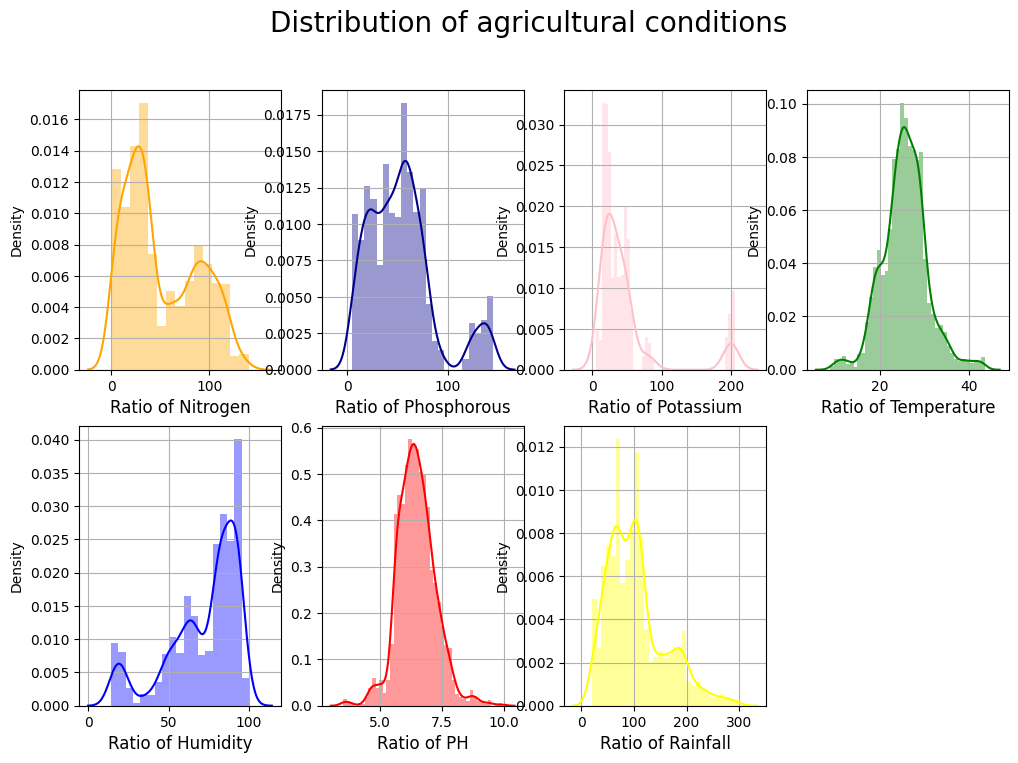

In [11]:
plt.subplot(2,4,1)
sns.distplot(df["nitrogen"], color="orange")
plt.xlabel("Ratio of Nitrogen",fontsize=12)
plt.grid()

plt.subplot(2,4,2)
sns.distplot(df["phosphorous"], color="darkblue")
plt.xlabel("Ratio of Phosphorous",fontsize=12)
plt.grid()

plt.subplot(2,4,3)
sns.distplot(df["potassium"], color="pink")
plt.xlabel("Ratio of Potassium",fontsize=12)
plt.grid()

plt.subplot(2,4,4)
sns.distplot(df["temperature"], color="green")
plt.xlabel("Ratio of Temperature",fontsize=12)
plt.grid()

plt.subplot(2,4,5)
sns.distplot(df["humidity"], color="blue")
plt.xlabel("Ratio of Humidity",fontsize=12)
plt.grid()

plt.subplot(2,4,6)
sns.distplot(df["ph"], color="red")
plt.xlabel("Ratio of PH",fontsize=12)
plt.grid()

plt.subplot(2,4,7)
sns.distplot(df["rainfall"], color="yellow")
plt.xlabel("Ratio of Rainfall",fontsize=12)
plt.grid()

plt.suptitle("Distribution of agricultural conditions",fontsize=20)
plt.show()

<Axes: >

<Axes: xlabel='humidity', ylabel='label'>

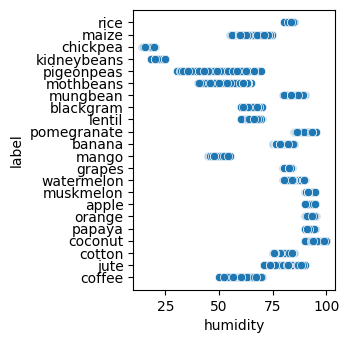

In [12]:
plt.subplot(2,4,7)
sns.scatterplot(x=df['humidity'],y=df['label'])

<Axes: ylabel='count'>

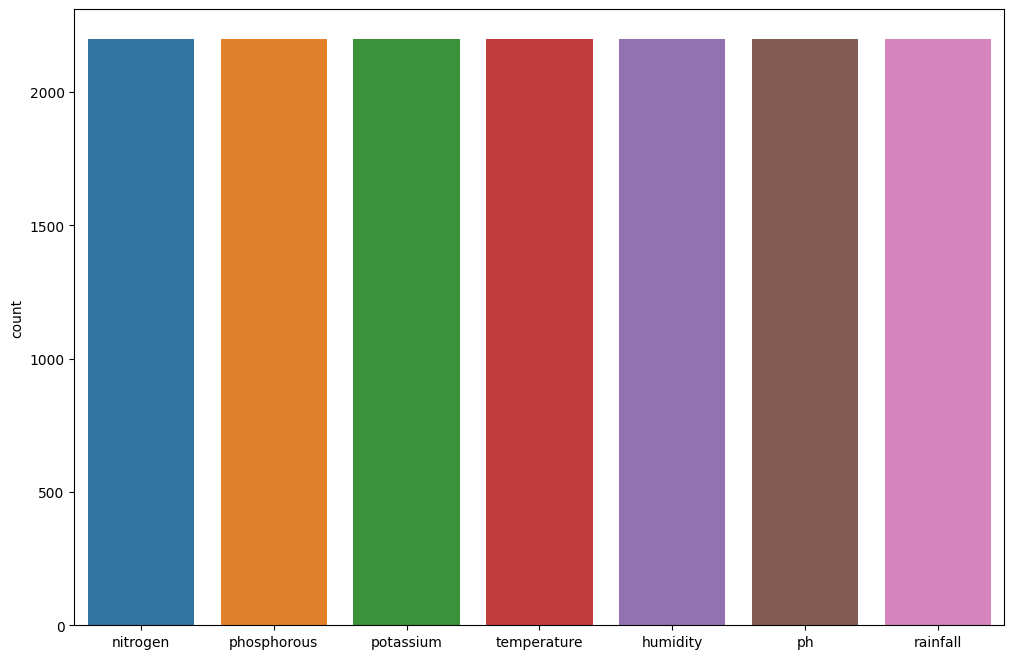

In [13]:
sns.countplot(df)

In [14]:
df

,nitrogen,phosphorous,potassium,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [15]:
df.describe()

,nitrogen,phosphorous,potassium,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


<Figure size 800x400 with 0 Axes>

<Axes: >

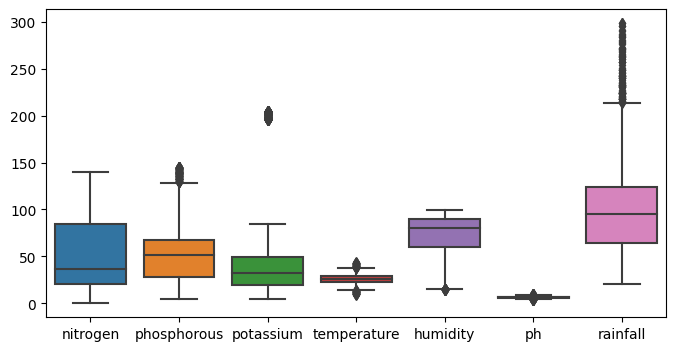

In [16]:
plt.figure(figsize=(8,4))
sns.boxplot(df)

In [17]:
Q1 = df['phosphorous'].quantile(0.25)
Q3 = df['phosphorous'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (df['phosphorous'] >= Q1 - 1.5 * IQR) & (df['phosphorous'] <= Q3 + 1.5 *IQR)
df=df.loc[filter]

In [18]:
df.shape

(2062, 8)

In [19]:
print("Crops which requires very low Ratio of Nitrogen Content in soil:",df[df["nitrogen"]<3]['label'].unique())
print("Crops which requires very high Ratio of Nitrogen Content in soil:",df[df["nitrogen"]>125]['label'].unique())

print(".................................................................")


print("Crops which requires very low Ratio of Phosporous Content in soil:",df[df["phosphorous"]<10]['label'].unique())
print("Crops which requires very High Ratio of Phosporous Content in soil:",df[df["phosphorous"]>135]['label'].unique())


print(".................................................................")




print("Crops which requires very low Ratio of Potassium Content in soil:",df[df["potassium"]<10]['label'].unique())
print("Crops which requires very High Ratio of Potassium Content in soil:",df[df["potassium"]>185]['label'].unique())


print(".................................................................")



print("Crops which requires very low Ratio of Temperature Content in soil:",df[df["temperature"]<15]['label'].unique())
print("Crops which requires very High Ratio of Temperature Content in soil:",df[df["temperature"]>37]['label'].unique())


print(".................................................................")



print("Crops which requires very High Ratio of Humidity Content in soil:",df[df["humidity"]<25]['label'].unique())
print("Crops which requires very low Ratio of Humidity Content in soil:",df[df["humidity"]>95]['label'].unique())


print(".................................................................")



print("Crops which requires very low ph:",df[df["ph"]<4]['label'].unique())
print("Crops which requires very high ph:",df[df["ph"]>8]['label'].unique())


print(".................................................................")



print("Crops which requires very low rainfall:",df[df["rainfall"]<30]['label'].unique())
print("Crops which requires very high rainfall:",df[df["rainfall"]>250]['label'].unique())

Crops which requires very low Ratio of Nitrogen Content in soil: ['kidneybeans' 'pigeonpeas' 'mothbeans' 'mungbean' 'lentil' 'pomegranate'
 'mango' 'grapes' 'apple' 'orange' 'coconut']
Crops which requires very high Ratio of Nitrogen Content in soil: ['cotton']
.................................................................
Crops which requires very low Ratio of Phosporous Content in soil: ['pomegranate' 'watermelon' 'muskmelon' 'orange' 'coconut']
Crops which requires very High Ratio of Phosporous Content in soil: []
.................................................................
Crops which requires very low Ratio of Potassium Content in soil: ['orange']
Crops which requires very High Ratio of Potassium Content in soil: ['grapes' 'apple']
.................................................................
Crops which requires very low Ratio of Temperature Content in soil: ['grapes' 'orange']
Crops which requires very High Ratio of Temperature Content in soil: ['grapes' 'papaya']
..

In [20]:
@interact
def compare(conditions=['nitrogen','phosphorous','potassium','temperature','humidity','ph','rainfall']):
    print("Average value for",conditions,"is {0:.2f}".format(df[conditions].mean()))
    print(".................................................................")
    print("Rice:{0:.2f}".format(df[(df['label']=='rice')][conditions].mean()))
    print("Black Grams:{0:.2f}".format(df[(df['label']=='blackgram')][conditions].mean()))
    print("Banana:{0:.2f}".format(df[(df['label']=='banana')][conditions].mean()))
    print("Jute:{0:.2f}".format(df[(df['label']=='jute')][conditions].mean()))
    print("Coconut:{0:.2f}".format(df[(df['label']=='coconut')][conditions].mean()))
    print("Apple:{0:.2f}".format(df[(df['label']=='apple')][conditions].mean()))
    print("Papaya:{0:.2f}".format(df[(df['label']=='papaya')][conditions].mean()))
    print("Muskmelon:{0:.2f}".format(df[(df['label']=='muskmelon')][conditions].mean()))
    print("Orange:{0:.2f}".format(df[(df['label']=='orange')][conditions].mean()))
    print("Cotton:{0:.2f}".format(df[(df['label']=='cotton')][conditions].mean()))
    print("Grapes:{0:.2f}".format(df[(df['label']=='grapes')][conditions].mean()))
    print("Coffee:{0:.2f}".format(df[(df['label']=='coffee')][conditions].mean()))
    print("Mung bean:{0:.2f}".format(df[(df['label']=='mungbean')][conditions].mean()))
    print("Moth Beans:{0:.2f}".format(df[(df['label']=='mothbeans')][conditions].mean()))
    print("Lentil:{0:.2f}".format(df[(df['label']=='lentil')][conditions].mean()))
    print("Mango:{0:.2f}".format(df[(df['label']=='mango')][conditions].mean()))
    print("Kidney Beans:{0:.2f}".format(df[(df['label']=='kidneybeans')][conditions].mean()))
    print("Maize:{0:.2f}".format(df[(df['label']=='maize')][conditions].mean()))
    print("Chick Peas:{0:.2f}".format(df[(df['label']=='chickpea')][conditions].mean()))
    print("Watermelon:{0:.2f}".format(df[(df['label']=='watermelon')][conditions].mean()))
    print("Pomegranate:{0:.2f}".format(df[(df['label']=='pomegranate')][conditions].mean()))
    print("Pigeons Peas:{0:.2f}".format(df[(df['label']=='pigeonpeas')][conditions].mean()))
    

interactive(children=(Dropdown(description='conditions', options=('nitrogen', 'phosphorous', 'potassium', 'tem…

In [21]:
print("Summer crops")
print(df[(df['temperature']>30) & (df['humidity']>50)]['label'].unique())
print("------------------------------------------------")
print("Winter crops")
print(df[(df['temperature']<20) & (df['humidity']>30)]['label'].unique())
print("------------------------------------------------")
print("Rainy crops")
print(df[(df['rainfall']>200) & (df['humidity']>50)]['label'].unique())
print("------------------------------------------------")

Summer crops
['pigeonpeas' 'mothbeans' 'blackgram' 'mango' 'grapes' 'orange' 'papaya']
------------------------------------------------
Winter crops
['maize' 'pigeonpeas' 'lentil' 'pomegranate' 'grapes' 'orange']
------------------------------------------------
Rainy crops
['rice' 'papaya' 'coconut']
------------------------------------------------


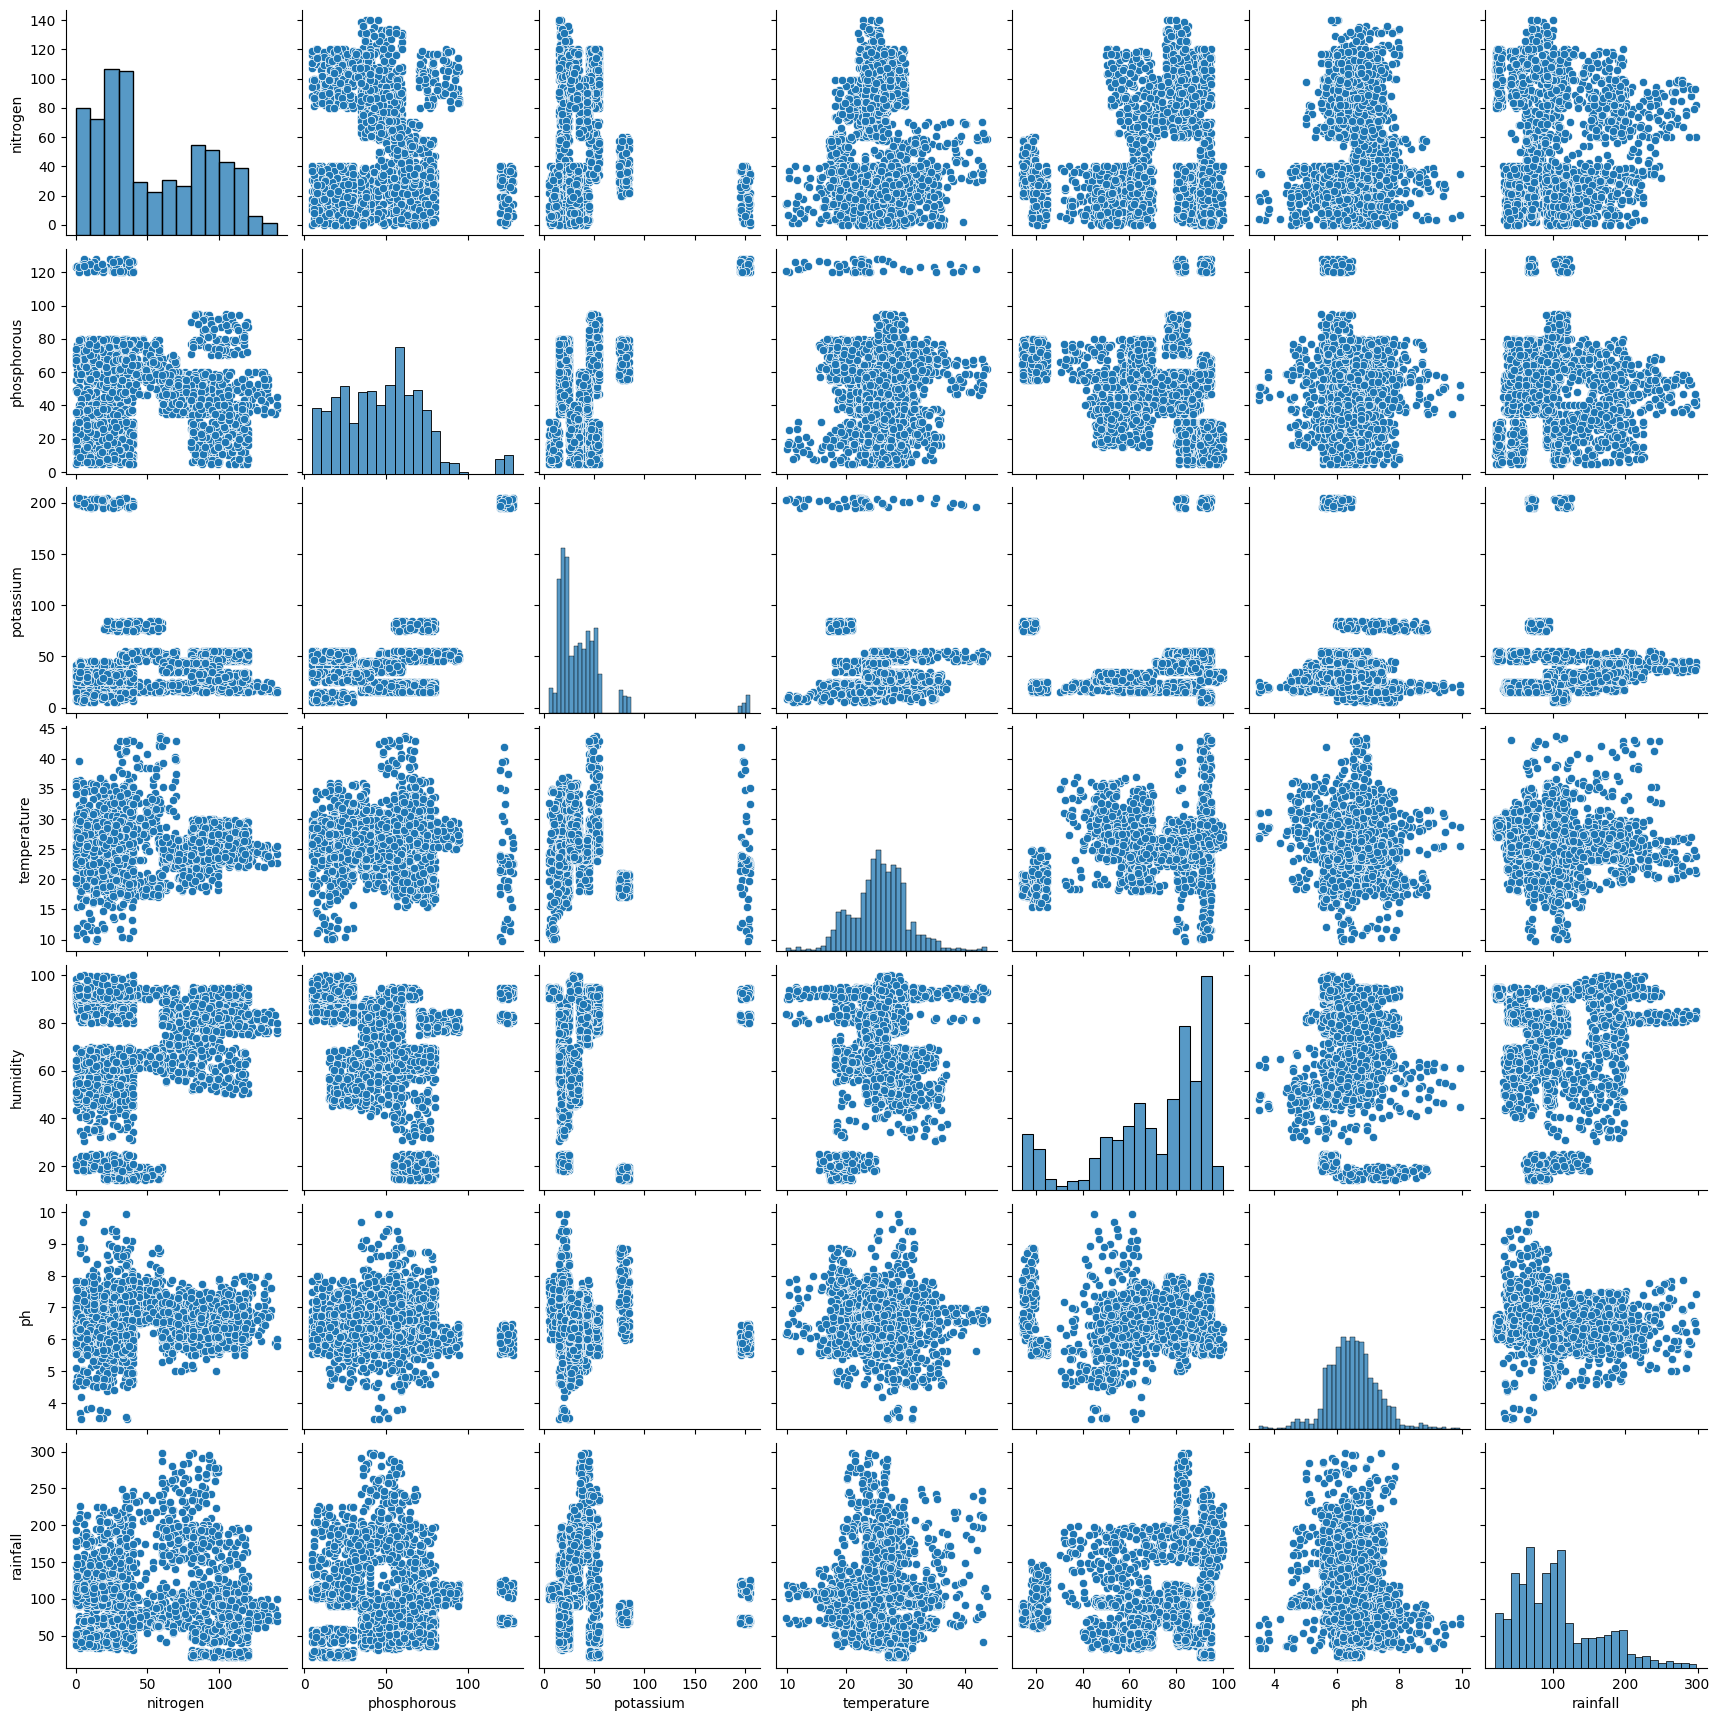

In [22]:
sns.pairplot(df)

In [23]:
#clustering analysis using k-mean
from sklearn.cluster import KMeans

x=df.drop(['label'],axis=1)

x=x.values

print(x.shape)

(2062, 7)


KMeans(n_clusters=1, n_init=10, random_state=0)

KMeans(n_clusters=2, n_init=10, random_state=0)

KMeans(n_clusters=3, n_init=10, random_state=0)

KMeans(n_clusters=4, n_init=10, random_state=0)

KMeans(n_clusters=5, n_init=10, random_state=0)

KMeans(n_clusters=6, n_init=10, random_state=0)

KMeans(n_clusters=7, n_init=10, random_state=0)

KMeans(n_init=10, random_state=0)

KMeans(n_clusters=9, n_init=10, random_state=0)

KMeans(n_clusters=10, n_init=10, random_state=0)

Text(0.5, 1.0, 'The Elbow method')

Text(0.5, 0, 'No of clusters')

Text(0, 0.5, 'wcss')

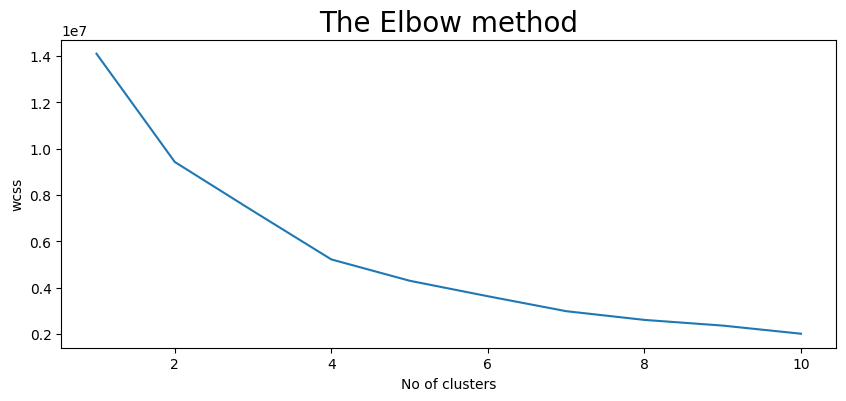

In [24]:
#el-bow method used to find out no of clusters and determine the optimum number of clusters within the dataset.
plt.rcParams['figure.figsize']=(10,4)
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i,init="k-means++",max_iter=300,n_init=10,random_state=0)
    km.fit(x)
    wcss.append(km.inertia_)
    
plt.plot(range(1,11),wcss)
plt.title("The Elbow method",fontsize=20)
plt.xlabel("No of clusters")
plt.ylabel("wcss")
plt.show()

In [25]:
km=KMeans(n_clusters=4,init="k-means++",max_iter=300,n_init=10,random_state=0)
y_means=km.fit_predict(x)

a=df['label']
y_means=pd.DataFrame(y_means)
z=pd.concat([y_means,a],axis=1)
z=z.rename(columns={0:'cluster'})


print("lets check the results after applying the K-Means clustering analysis \n")
print("Crops in First cluster:",z[z['cluster']==0]['label'].unique())
print("_______________________________________________________________________")

print("Crops in Second cluster:",z[z['cluster']==1]['label'].unique())

print("_______________________________________________________________________")

print("Crops in Third cluster:",z[z['cluster']==2]['label'].unique())

print("_______________________________________________________________________")

print("Crops in Fourth cluster:",z[z['cluster']==3]['label'].unique())

lets check the results after applying the K-Means clustering analysis 

Crops in First cluster: ['rice' 'pigeonpeas' 'apple' nan 'orange' 'papaya' 'coconut' 'cotton'
 'jute']
_______________________________________________________________________
Crops in Second cluster: ['maize' 'banana' nan 'grapes' 'watermelon' 'muskmelon' 'orange' 'papaya'
 'coconut' 'cotton' 'jute']
_______________________________________________________________________
Crops in Third cluster: ['maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans' 'mungbean'
 'blackgram' 'lentil' 'pomegranate' 'mango' 'muskmelon' 'apple' nan
 'orange' 'papaya']
_______________________________________________________________________
Crops in Fourth cluster: [nan 'grapes' 'muskmelon']


In [26]:
y=df['label']
x=df.drop(['label'],axis=1)

print("Shape of x",x.shape)
print("Shape of x=y",y.shape)

Shape of x (2062, 7)
Shape of x=y (2062,)


In [27]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.2,random_state=0)

print("The shape of x train",x_train.shape)
print("The shape of x test",x_test.shape)
print("The shape of y train",x_train.shape)
print("The shape of y test",x_test.shape)

The shape of x train (1649, 7)
The shape of x test (413, 7)
The shape of y train (1649, 7)
The shape of y test (413, 7)


In [28]:
# LOGUSTIC REGRESSION
from sklearn.linear_model import LogisticRegression

model=LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

<Axes: >

Text(0.5, 1.0, 'Confusion matrix for logistic regression')

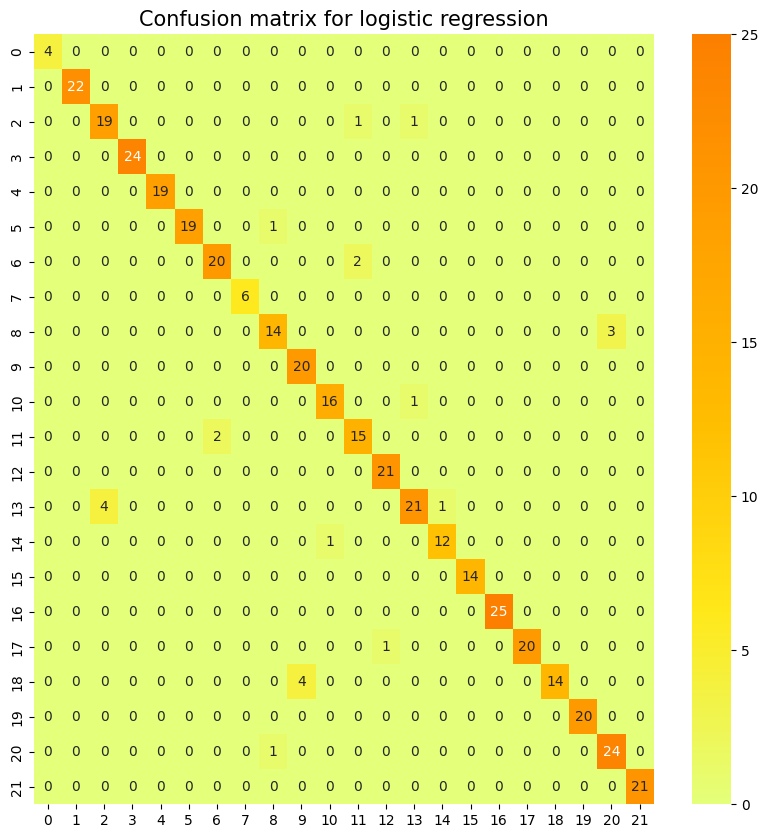

In [29]:
#lets evaluate model performance
from sklearn.metrics import confusion_matrix

#lets print the confusion matrix first
plt.rcParams["figure.figsize"]=(10,10)
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,cmap='Wistia')
plt.title("Confusion matrix for logistic regression",fontsize=15)
plt.show()

In [30]:
from sklearn.metrics import classification_report
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00         4
      banana       1.00      1.00      1.00        22
   blackgram       0.83      0.90      0.86        21
    chickpea       1.00      1.00      1.00        24
     coconut       1.00      1.00      1.00        19
      coffee       1.00      0.95      0.97        20
      cotton       0.91      0.91      0.91        22
      grapes       1.00      1.00      1.00         6
        jute       0.88      0.82      0.85        17
 kidneybeans       0.83      1.00      0.91        20
      lentil       0.94      0.94      0.94        17
       maize       0.83      0.88      0.86        17
       mango       0.95      1.00      0.98        21
   mothbeans       0.91      0.81      0.86        26
    mungbean       0.92      0.92      0.92        13
   muskmelon       1.00      1.00      1.00        14
      orange       1.00      1.00      1.00        25
      papaya       1.00    

In [31]:
df.tail()

,nitrogen,phosphorous,potassium,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [32]:
prediction=model.predict((np.array([[105,35,40,25,64,7,160]])))

print("The suggested crop for given climatic condition is: ",prediction)

The suggested crop for given climatic condition is:  ['coffee']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [33]:
import pickle
pickle.dump(model,open('/model.pkl','wb'))

In [34]:
pip install flask

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [36]:
from flask import Flask
app = Flask(__name__)